<div class="alert alert-block alert-info">
<center>MÉTODOS NUMÉRICOS</center>
<center>LISTA 12</center>
<center>ALUNO: JONATAS DA SILVA DUARTE</center>
</div>


In [2]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import scipy.linalg as sla

np.__version__

'1.20.1'

###### Implemente uma função que encontre o vetor solução de um sistema de equações lineares usandodecomposição LU.

In [3]:
## gaussiana com pivotamento parciall

def pivotamento_parcial(A: np.ndarray,B:np.ndarray):

    def linha_maior_pivo(ab, lin, col):
        pivos = np.abs(ab[lin:, col + 1])
        return (pivos.argmax() + 1)

    def escalona(ab):
        n = len(A)
        for col in range(n-1):
            for lin in range(col+1,n):
                ab[lin] = ab[lin] - (ab[lin,col]/ab[col,col])*ab[col]
        return ab[:,:-1], ab[:,-1]


    def swap_linhas(ab, l_1, l_2):
        ab[[l_1, l_2]] = ab[[l_2, l_1]]

    A_B = np.c_[A,B]
    for col in range(A_B.shape[0] - 1):
        m_pivo = linha_maior_pivo(A_B, col, col)
        if col != m_pivo:
            swap_linhas(A_B, col, m_pivo)
             
   
    print("\n------------------------------------\nMatriz reorganizada:\n",A_B)

    #matriz escalonada
    A_e, B_e = escalona(A_B)
    print("\n------------------------------------\nMatriz escalonada:\n", np.c_[A_e, B_e])

    def sist_lin_tri_sup(A, b):
        n = len(b)
        x = np.empty(n)
        x[-1] = b[-1] / A[-1, -1]
        for i in range(n - 2, -1, -1):
            x[i] = (b[i] - np.sum(A[i, i + 1:] * x[i + 1:])) / A[i, i]
        return x
    
    #resultado com a matriz triangular superior
    return sist_lin_tri_sup(A_e, B_e)


In [4]:
## mmostrar e comparar o resultado

def printa_compara(a, b):
    print("\n----------- Comparação --------------\nBiblioteca:\n",sla.solve(a,b),"\n\nImplementação:\n",pivotamento_parcial(a,b))

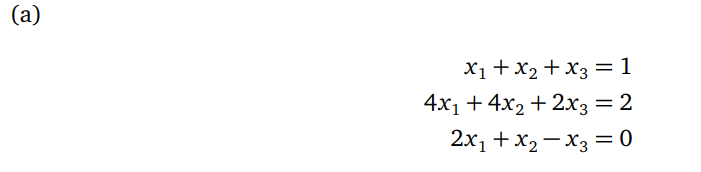

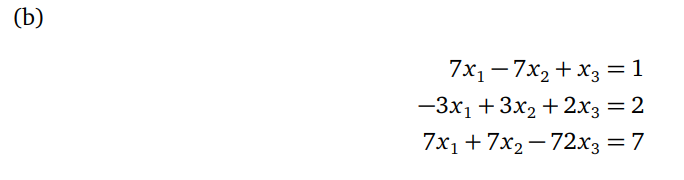

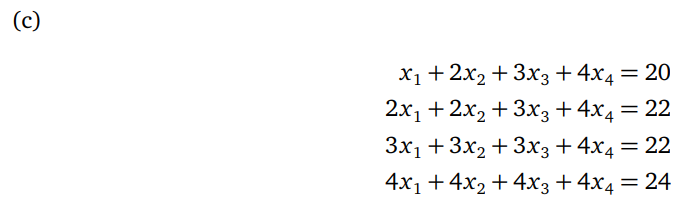